In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# create engine to hawaii.sqlite
engine = create_engine(r"sqlite:///C:\Users\rache\sqlalchemy-challenge\Resources\hawaii.sqlite")

In [ ]:
# reflect an existing database into a new model
Base = automap_base ()
Base.prepare(reflect=False, autoload_with=engine)
Base.classes.keys()

['measurement', 'station']

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most recent date: {recent_date[0]}")

Most recent date: 2017-08-23


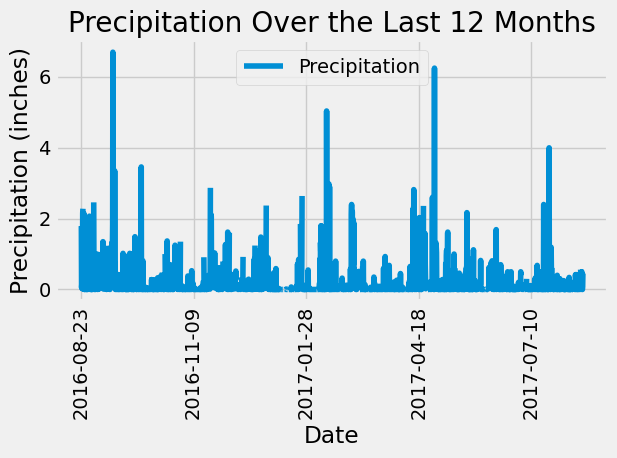

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=["Date", "Precipitation"])

# Sort the dataframe by date
precip_df = precip_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x="Date", y="Precipitation", rot=90)
plt.title("Precipitation Over the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.tight_layout()
plt.show()

In [24]:
#Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(func.count(Station.station)).scalar()
print(f"Total station: {total_station}")

Total station: 9


In [33]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
#Show results
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'

temps = session.query(func.min(Measurement.tobs), 
                      func.max(Measurement.tobs), 
                      func.avg(Measurement.tobs)).\
        filter(Measurement.station == most_active).all()

print(f"Min: {temps[0][0]}, Max: {temps[0][1]}, Avg: {temps[0][2]:.2f}")

Min: 54.0, Max: 85.0, Avg: 71.66


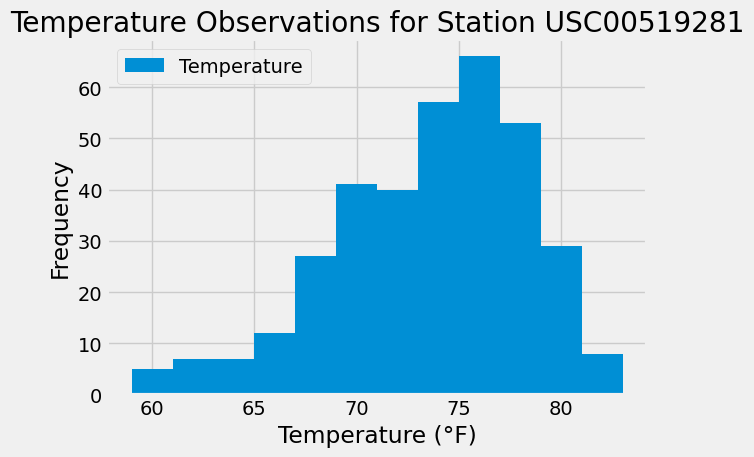

In [36]:
# Using the most active station id

# Calculate date 1 year before the last date
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query temperature observations for the most active station
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date >= prev_year).all()

# Convert to DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=["Temperature"])

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_df.plot.hist(bins=12)
plt.title("Temperature Observations for Station USC00519281")
plt.xlabel("Temperature (°F)")
plt.tight_layout()
plt.show()

# Close Session

In [37]:
# Close Session
session.close()